In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.patches
import matplotlib.lines
import matplotlib.colors
matplotlib.rcParams["figure.dpi"] = 150

import numpy as np
np.set_printoptions(precision=4, suppress=True)

import sys
sys.path.append("..")
from encoder_learning_benchmarks import \
    optimizers, common, datasets, networks, rules, \
    benchmark, positive_definite_matrix, utils

# Batch Neural Gas

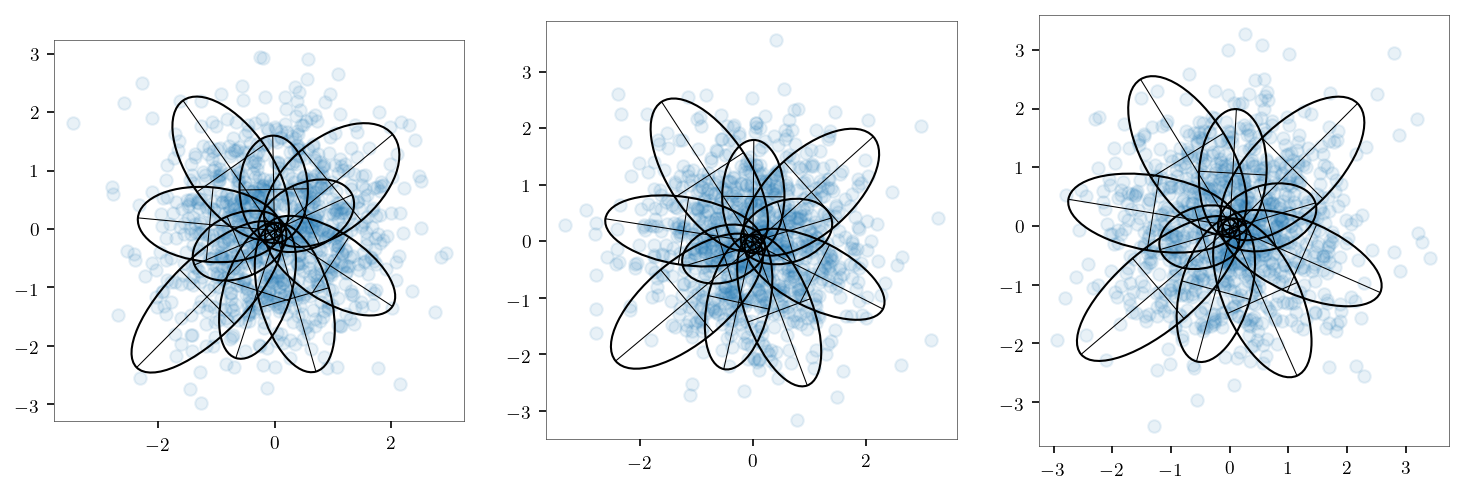

In [63]:
rng = np.random.RandomState(39019)
net = networks.rbf.RBF(2, 10, rng=rng)
rule = rules.neural_gas.NeuralGas(2, 10, 1, rng=rng)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    xs = rng.randn(1000, 2)
    As = net.activities(xs)
    res = rule.do_step(As, xs, None, None, None, net)

    eta = 1e-0
    net.mus -= eta * res["mus"]
    net.thetas -= eta * res["thetas"]

    axs[i].scatter(xs[:, 0], xs[:, 1], marker='o', alpha=0.1)
    utils.visualise_network(axs[i], net)
    axs[i].set_aspect(1)

# Online Neural Gas

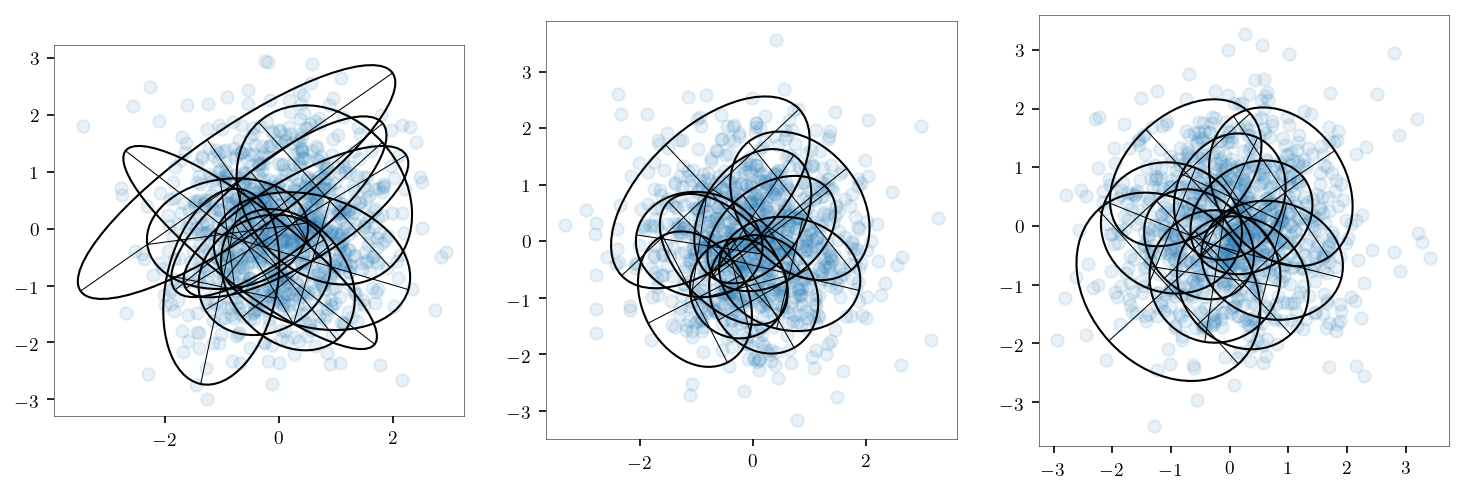

In [64]:
rng = np.random.RandomState(39019)
net = networks.rbf.RBF(2, 10, rng=rng)
rule = rules.neural_gas.NeuralGas(2, 10, 1, rng=rng, batch=False)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    n_smpls = 1000
    n_batch = 10
    xs = rng.randn(n_smpls, 2)
    for j in range(n_smpls // n_batch):
        j0, j1 = n_batch * j, n_batch * (j + 1)
        As = net.activities(xs[j0:j1])
        res = rule.do_step(As, xs[j0:j1], None, None, None, net)

        eta = 1e-2
        net.mus -= eta * res["mus"]
        net.thetas -= eta * res["thetas"]

    axs[i].scatter(xs[:, 0], xs[:, 1], marker='o', alpha=0.1)
    utils.visualise_network(axs[i], net, cov_scale=1.0)
    axs[i].set_aspect(1)